In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

data = pd.read_csv('edlich-kmeans-A0.csv')
data


,V1,V2,V3
0,-5.340236,4.747246,3.823326
1,-9.587065,-3.434466,9.701839
2,-8.385012,-3.902794,8.514620
3,5.708226,2.658575,5.404482
4,-7.431665,-4.390251,9.003216
...,...,...,...
95,5.240474,2.983800,5.104915
96,-1.675543,3.780111,-8.060940
97,2.979751,10.772783,-10.093143
98,-5.154519,5.976515,2.794622


In [2]:
print(data.shape)

(100, 3)


In [3]:
f1 = data['V1'].values
f2 = data['V2'].values
f3 = data['V3'].values

In [4]:
f1

array([-5.34023562, -9.58706542, -8.38501223,  5.7082258 , -7.43166517,
        5.028509  ,  6.37219562, -8.35525163, -3.40526552,  5.62156138,
       -8.84016412, -4.61692581,  4.94946903,  3.70343606, -5.1795348 ,
       -7.95099381, -3.07076859,  4.00128095, -4.42847662, -4.91662608,
       -7.36754369, -1.39236828, -5.18575661, -9.33855585, -8.3473716 ,
       10.34469203, -0.97476618, -3.40786306, -1.36947289,  2.4369706 ,
       -1.70617854, -2.34049748,  5.13307774,  4.47860799, -9.11525282,
       -4.54014196,  4.13618317, -5.97263413, -3.79872596, -8.77099893,
        3.4540394 ,  2.24380863,  2.94124047, -3.69297625,  4.10079663,
       -7.24433689,  5.28934395,  7.65107352,  3.89755038,  6.00732033,
        4.95680678,  4.28962784, -2.52701507, -2.57316647,  6.8457331 ,
        5.56586894, -4.36500448,  6.28056286, -9.79229975,  3.40411038,
        6.21130221, -5.21582739, 10.64062428,  4.93270495,  2.96300936,
        5.63576941, -5.05417849, -4.26072049, -5.45865171,  4.15

In [5]:
X = np.array(list(zip(f1, f2, f3)))

In [6]:
X

array([[ -5.34023562,   4.7472463 ,   3.82332607],
       [ -9.58706542,  -3.43446551,   9.70183939],
       [ -8.38501223,  -3.90279369,   8.51462008],
       [  5.7082258 ,   2.65857479,   5.40448245],
       [ -7.43166517,  -4.39025105,   9.00321635],
       [  5.028509  ,   9.04769521,  -8.54843651],
       [  6.37219562,   4.45994039,   4.36935755],
       [ -8.35525163,  -3.51695636,   7.16271385],
       [ -3.40526552,   2.28142739,  -7.63117179],
       [  5.62156138,   3.43105644,   4.66657363],
       [ -8.84016412,  -3.81234109,   8.80786358],
       [ -4.61692581,   2.83368789,  -7.96289974],
       [  4.94946903,   3.57706667,   5.14013488],
       [  3.70343606,   8.61137549,  -9.59257599],
       [ -5.1795348 ,   4.8463202 ,   4.24721594],
       [ -7.95099381,  -3.75513267,   9.51565272],
       [ -3.07076859,   1.47953458,  -7.79850529],
       [  4.00128095,   9.65877107,  -8.12242599],
       [ -4.42847662,   6.65686938,   4.00895955],
       [ -4.91662608,   4.52706

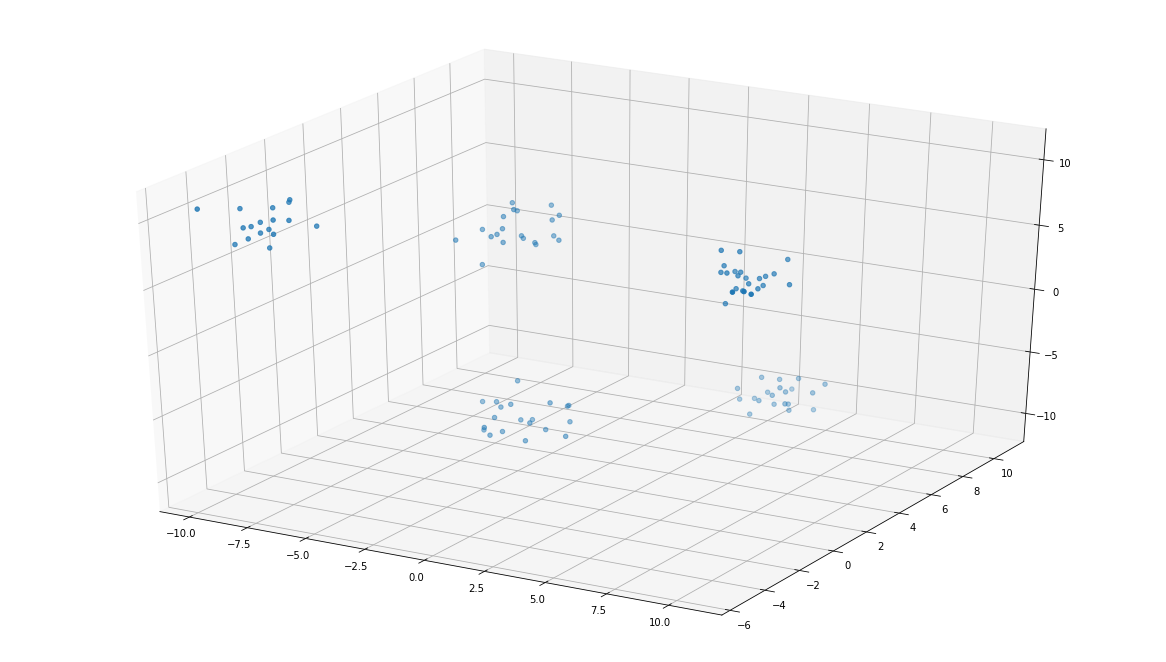

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [8]:
# die Graphik verrät, dass die Unterteilung in 5 Cluster erfolgen sollte
# somit ist n_clusters = 5
kmeans = KMeans(n_clusters=5)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [9]:
labels

array([1, 3, 3, 2, 3, 0, 2, 3, 4, 2, 3, 4, 2, 0, 1, 3, 4, 0, 1, 1, 3, 4,
       1, 3, 3, 2, 4, 4, 4, 0, 4, 4, 0, 0, 3, 1, 0, 1, 4, 3, 0, 0, 0, 1,
       0, 3, 2, 2, 0, 2, 2, 0, 4, 4, 2, 2, 1, 2, 3, 0, 2, 1, 2, 2, 0, 2,
       1, 1, 1, 0, 0, 2, 4, 2, 2, 4, 3, 0, 2, 4, 4, 0, 3, 1, 1, 3, 1, 1,
       1, 2, 4, 4, 4, 3, 2, 2, 4, 0, 1, 1], dtype=int32)

In [10]:
centroids

array([[ 3.66536804,  8.91074968, -9.06579829],
       [-5.10691526,  5.60179825,  3.71956936],
       [ 6.47155208,  2.70446035,  5.19967608],
       [-8.53242046, -3.55401526,  8.96857685],
       [-2.40331671,  2.14752865, -8.02378894]])

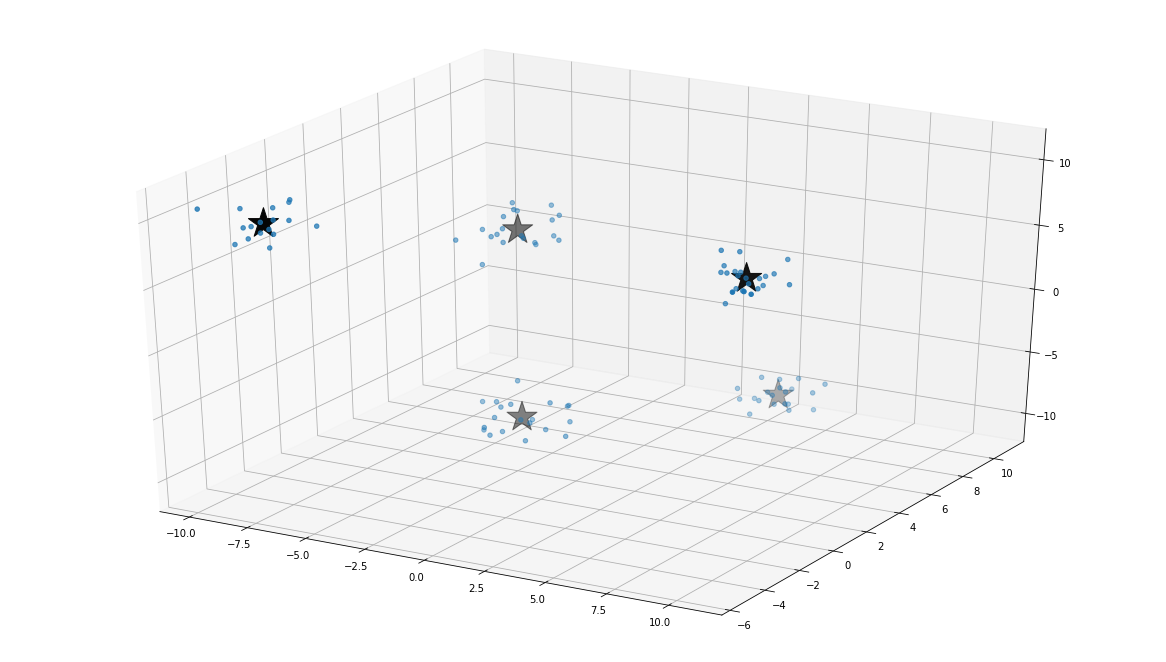

In [11]:
# die Sterne stellen die "Centroiden" der 5 Cluster dar
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c='#050505', s=1000)

In [15]:
labels = kmeans.predict(X)
labels

array([1, 3, 3, 2, 3, 0, 2, 3, 4, 2, 3, 4, 2, 0, 1, 3, 4, 0, 1, 1, 3, 4,
       1, 3, 3, 2, 4, 4, 4, 0, 4, 4, 0, 0, 3, 1, 0, 1, 4, 3, 0, 0, 0, 1,
       0, 3, 2, 2, 0, 2, 2, 0, 4, 4, 2, 2, 1, 2, 3, 0, 2, 1, 2, 2, 0, 2,
       1, 1, 1, 0, 0, 2, 4, 2, 2, 4, 3, 0, 2, 4, 4, 0, 3, 1, 1, 3, 1, 1,
       1, 2, 4, 4, 4, 3, 2, 2, 4, 0, 1, 1], dtype=int32)

In [16]:
# Can you print the clustering vector?
# dataFrame mit 3d Punkt und zugehörigem cluster
data["Cluster"] = labels
data

,V1,V2,V3,Cluster
0,-5.340236,4.747246,3.823326,1
1,-9.587065,-3.434466,9.701839,3
2,-8.385012,-3.902794,8.514620,3
3,5.708226,2.658575,5.404482,2
4,-7.431665,-4.390251,9.003216,3
...,...,...,...,...
95,5.240474,2.983800,5.104915,2
96,-1.675543,3.780111,-8.060940,4
97,2.979751,10.772783,-10.093143,0
98,-5.154519,5.976515,2.794622,1
